# Assignment 3 Protein Data Bank

**Due 18 October by midnight**

A protein is a molecule that is a sequence of amino acid residues. The <a href="http://www.rcsb.org/pdb"> Protein Data Bank</a> records the 3D structures known for protein molecules. Two examples are HIV Protease (<a href="http://www.rcsb.org/pdb/explore.do?structureId=7hvp">7hvp</a> ), an important AIDS drug target (left below), and green fluorescent protein (<a href="http://www.pdb.org/pdb/explore.do?structureId=1GFL">1gfl</a>), which earned its discoverers the <a href="http://nobelprize.org/nobel_prizes/chemistry/laureates/2008/speedread.html">Nobel Prize</a> (right below).  Many types of information are stored in a PDB file; we will be interested only in lines that start with `ATOM  `, and only in certain columns of these lines.  Their format is described later.

<img src="files/7HVP.jpg" alt="7hvp" title="7hvp" width="200" height="200" /><img src="files/1GFL.jpg" alt="1gfl" title="1gfl" width="200" height="200" />

In [9]:
# fill in your onyen (not PID) here
Author = 'jcaldous'
Collaborators = []

In [10]:
%matplotlib inline
import numpy as np
import pylab
from mpl_toolkits.mplot3d import Axes3D # for the 3D plots we'll make below
import comp116

check, report = comp116.start('A3')

## 1. Read PDB files.

Write a function `readPDBfile(filename)` that will read the atoms for a protein stored in pdb file whose name is given as the argument.  Your function should return a Python tuple containing 4 values: `(anum, aname, resno, coords)`.

**anum** should be an array with the serial number for each atom.  
**aname** should be an array of strings giving the 4-letter atom name for each atom.  The strings in aname should be in upper case.  
**resno** array with a residue sequence number for each atom.  
**coords** an nx3 array with xyz coordinates (in angstroms) for each atom.

We have included a prototype for your function below. You are to write code in the area indicated.

In [11]:
def readPDBfile(filename):
    '''read a PDB file, extract the ATOM lines, and return
       atom number, atom name, residue number, and coords for each'''
    # build them up in lists because they are cheap to append
    anum = []
    aname = []
    resno = []
    coords = []

    #your work goes here. You should read the ATOM lines and append the appropriate
    #fields to the lists anum, aname, resno, and coords
     # read every line from the file
    for line in open(filename, 'r'):
        # process the ATOM lines
        if line[0:6] == 'ATOM  ':
            #serial number
            anum.append(int(line[6:11]))
            #name
            aname.append(line[12:16])
            #residue number
            resno.append(int(line[22:26]))
            #get the x coords
            x= float(line[30:38])
            #get the y coords
            y= float(line[38:46])
            #get z
            z= float(line[46:54])
            #coords
            coords.append([x,y,z])

    # convert the results to numpy arrays
    anum = np.array(anum)
    aname = np.array(aname)
    coords = np.array(coords)
    resno = np.array(resno)

    # return the 4 results
    return (anum, aname, resno, coords)

# Now we will call your function to test it.
# We also use these values for testing in the later parts
num, name, rn, c = readPDBfile('7HVP.pdb')

check("Part 1 num", num, points=4)
check("Part 1 name", name, points=4)
check("Part 1 rn", rn, points=4)
check("Part 1 c", c, points=4)

Part 1 num appears correct
Part 1 name appears correct
Part 1 rn appears correct
Part 1 c appears correct


## 2. Draw a 3D graph of the Calpha backbone of the protein.

Write a function <tt>drawCA(aname, coords)</tt> that uses <tt>Axes3d.plot</tt> to draw the Calpha backbone of the protein: it should connect atoms with name <tt> ' CA ' </tt> (that is SPACE C A SPACE) in sequence, and ignore all the other atoms.  Information about how to make the 3D plot is in the help section below.

Part 2 fig appears correct


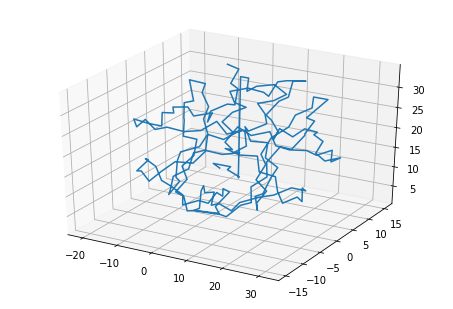

In [12]:
def drawCA(aname, coords):
    '''plot the Calpha backbone of an atom'''
    fig = pylab.figure()
    #convert to 3d
    ax = Axes3D(fig) 
    #extract CA coordinates
    alpha_coords= coords[aname== ' CA ']
    # get CA x
    x= alpha_coords[:,0]
    #y
    y= alpha_coords[:,1]
    #and z
    z= alpha_coords[:,2]
    ax.plot(x, y, z) # x, y, and z are 1D arrays
    
# test your functions
drawCA(name, c)

check('Part 2 fig', pylab.gcf(), points=14)


## 3. List the Hbonds

Write a function <tt>Hbonds(anum, aname, resno, coords)</tt> that looks for pairs with a Nitrogen (second letter of the name is 'N') and Oxygen (second letter is 'O') atoms whose distance is between 2.6 and 3.2 angstroms, inclusive. Such a pair is deemed to form a hydrogen bond if the residue sequence numbers of these atoms differ by at least 2. Return a list containing the pairs of atom numbers for hydrogen bonding pairs.

In [13]:
# this is the function you must write
def Hbonds(anum, aname, resno, coords):
    '''Find hydrogen bonds'''
    pairs = [] # build up the result in this list
    for i in range(len(coords)):
        if aname[i][1]=='N':
            for j in range(len(coords)):
                if aname[j][1]=='O':
                    d = np.sqrt(np.sum((coords[i] - coords[j])**2))
                    if d >= 2.6 and d <= 3.2 and abs(resno[i] - resno[j]) >= 2:
                        pairs.append((anum[i],anum[j]))
    return pairs

# now we test your Hbonds function
pairs3 = Hbonds(num, name, rn, c)

check('Part 3 pairs', np.array(sorted(pairs3)), points=20)

Part 3 pairs appears correct


## 4. Now use your functions on the second protein. 

Part 4 num appears correct
Part 4 name appears correct
Part 4 rn appears correct
Part 4 c appears correct
Part 4 fig appears correct
Part 4 pairs appears correct


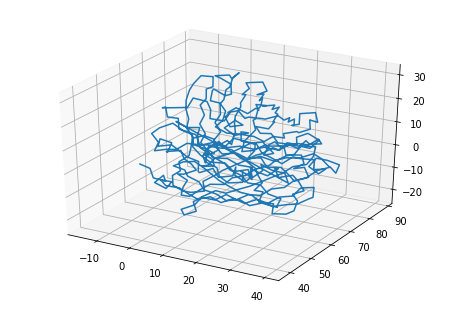

In [14]:
# load the data
num1GFL, name1GFL, rn1GFL, c1GFL = readPDBfile('1GFL.pdb')

check("Part 4 num", num1GFL, points=4)
check("Part 4 name", name1GFL, points=4)
check("Part 4 rn", rn1GFL, points=4)
check("Part 4 c", c1GFL, points=4)

# draw the graph
drawCA(name1GFL, c1GFL)

check('Part 4 fig', pylab.gcf(), points=14)

# list the Hbonds
pairs1GFL = Hbonds(num1GFL, name1GFL, rn1GFL, c1GFL)

check('Part 4 pairs', np.array(sorted(pairs1GFL)), points=20)


# Helps

## Opening and Reading files

Reading a file such as `7hvp.pdb` (for HIV protease) is easy in Python. You can simply say:

    for line in open('7hvp.pdb', 'r'):
        # do something for every line
            
The first argument to the `open` function is a string giving the name of the file. The second argument to the `open` function is a string indicating the file mode. We're using `'r'` here because we are reading the file. Other possible values include `'w'` for creating a new file to write and `'a'` for appending to an existing file.

If the first six characters of the line are `'ATOM  '` (2 spaces on the end) then that line has interesting information. The numbers and names occupy fixed positions on a line, so you can extract them with indexing and convert them from strings to numbers, if necessary, in your reader.


## Format of ATOM records

This is from the documentation of the PDB format on the rcsb web site.

<pre>
COLUMNS        DATA TYPE           CONTENTS
--------------------------------------------------------------------------------
 1- 6          Record name         "ATOM  "
 7 - 11        Integer             Atom serial number.
13 - 16        Atom                Atom name.
17             Character           Alternate location indicator.
18 - 20        Residue name        Residue name.
22             Character           Chain identifier.
23 - 26        Integer             Residue sequence number.
27             AChar               Code for insertion of residues.
31 - 38        Real(8.3)           Orthogonal coordinates for X in Angstroms.
39 - 46        Real(8.3)           Orthogonal coordinates for Y in Angstroms.
47 - 54        Real(8.3)           Orthogonal coordinates for Z in Angstroms.
55 - 60        Real(6.2)           Occupancy.
61 - 66        Real(6.2)           Temperature factor (Default = 0.0).
73 - 76        LString(4)          Segment identifier, left-justified.
77 - 78        LString(2)          Element symbol, right-justified.
79 - 80        LString(2)          Charge on the atom.
</pre>

**Example:**

<pre>
         1         2         3         4         5         6         7         8
12345678901234567890123456789012345678901234567890123456789012345678901234567890
ATOM      1  N   PRO A   1      -3.260   7.392  33.952  1.00 24.47           N
ATOM      2  CA  PRO A   1      -2.317   6.655  34.795  1.00 22.40           C
ATOM      3  C   PRO A   1      -0.919   6.658  34.208  1.00 20.82           C
ATOM      4  O   PRO A   1      -0.802   7.111  33.058  1.00 21.07           O
ATOM      5  CB  PRO A   1      -2.897   5.256  34.804  1.00 23.12           C
ATOM      6  CG  PRO A   1      -4.336   5.353  34.377  1.00 24.12           C
ATOM      7  CD  PRO A   1      -4.607   6.783  33.948  1.00 24.43           C
</pre>

### Other hints

1. Do **not** modify data files! Your readPDBfile should work on any of the files.
2. Your reader returns many variables. To capture them all, you'll have to call it with a line something like this: `a, an, rn, c = readPDBfile('A4/7hvp.pdb')`. This is called an unpacking assignment, the thing on the right of the = operator is a sequence, so python knows to unpack it into the variables listed. The number of variables must match the length of the sequence or you'll get an error message.
3. To plot the 3D line drawings requested use the Axes3D object like this:
<pre>
    fig = pylab.figure()
    ax = Axes3D(fig)
    ax.plot(x, y, z) # x, y, and z are 1D arrays
</pre>    
4. Compare strings with the usual comparison operators we used for numbers.
5. Numpy arrays of strings are a bit strange. To get the second character of the name in order to determine its type, you'll need to subscript the array to get the string and then subscript the resulting string. You can't say `aname[3, 1]` to get the 2nd character of the 4th atom name. Instead you have to say `aname[3][1]`.
6. Break the problems down into small tasks. When making your loops, think of what has to be done once (like opening the file) and what has to be done repeatedly (like processing the line.)


In [15]:
#more help in code form, nothing to do here

#strings have several methods that you will find useful for this assignment
s = 'aBc'
t = s.upper() # make it all upper case
u = t.lower() # make that all lower case
print(s, t, u)

# we can convert from strings to integers or floats
s = '123'  # a string with the characters 1, 2, and 3
i = int(s)  # now it is the number 123 (one hundred twenty three)

# note that they look the same when we print them but their types are different
print(s, i)
print(type(s), type(i))

t = '3.14'  # a string with characters 3, period, 1, and 4
f = float(t)  # a floating point number 3.14

print(t, f)
print(type(t), type(f))

aBc ABC abc
123 123
<class 'str'> <class 'int'>
3.14 3.14
<class 'str'> <class 'float'>


## Done!

Now get your report and submit your assignment.

In [16]:
report(Author, Collaborators)

Part 1 c appears correct
Part 1 name appears correct
Part 1 num appears correct
Part 1 rn appears correct
Part 2 fig appears correct
Part 3 pairs appears correct
Part 4 c appears correct
Part 4 fig appears correct
Part 4 name appears correct
Part 4 num appears correct
Part 4 pairs appears correct
Part 4 rn appears correct
Report for jcaldous
  Collaborators: []
  12.0 of 12 possibly correct for up to 100.0 of 100 points
